In [2]:
import json, glob, os, random
import cv2
import numpy as np
import visualization as viz

class Json2Yolo:
    def __init__(self, antTxtPath, resultJsonPath, imgFolder, classL):
        # antTxtPath
        exampleImgPath = open(antTxtPath,"r").readlines()[0].replace(".txt",".jpg").replace('\n','')
        self.height, self.width, _ = cv2.imread(exampleImgPath).shape
        self.D = { os.path.basename(line)[:-1].replace('.jpg','.txt'):[] for line in open(antTxtPath,"r").readlines() }
        # resultJsonPath
        for d in json.load(open(resultJsonPath,"r")):
            key, cid, (xmin,ymin,w,h), conf = d['image_id'], d['category_id'], d['bbox'], d['score']
            cx = round((xmin+w/2)/self.width,6)
            cy = round((ymin+h/2)/self.height,6)
            w  = round(w/self.width,6)
            h  = round(h/self.height,6)
            self.D[key+".txt"].append( [cid-1,cx,cy,w,h,conf] )
        self.resultJsonPath = resultJsonPath
        self.imgFolder      = imgFolder
        self.classL         = classL
    
    def convert(self):
        outputPath = f"{os.path.dirname(self.resultJsonPath)}/yoloFormat"
        os.makedirs( outputPath, exist_ok=True )
        for key in self.D.keys():
            with open(f"{outputPath}/{key}", "w") as f:
                for cid,cx,cy,w,h,conf in self.D[key]:
                    f.write(f"{cid} {cx} {cy} {w} {h} {conf}\n")
                    
    def visualize(self, threshold, num):
        keyL = list(filter(lambda key:self.D[key], self.D))
        random.shuffle(keyL)
        for key in keyL[:num]:
            arr     = np.array(self.D[key])
            arr     = arr[arr[:,-1]>=threshold]
            antPath = f"{os.path.dirname(self.resultJsonPath)}/yoloFormat/{key}"
            viz.show( f"{self.imgFolder}/{key[:-4]}.jpg", antPath, "yoloFloat", arr[:,1:-1], arr[:,0].astype(int), arr[:,-1], self.classL, valueRatios=(1.5,1.5) )

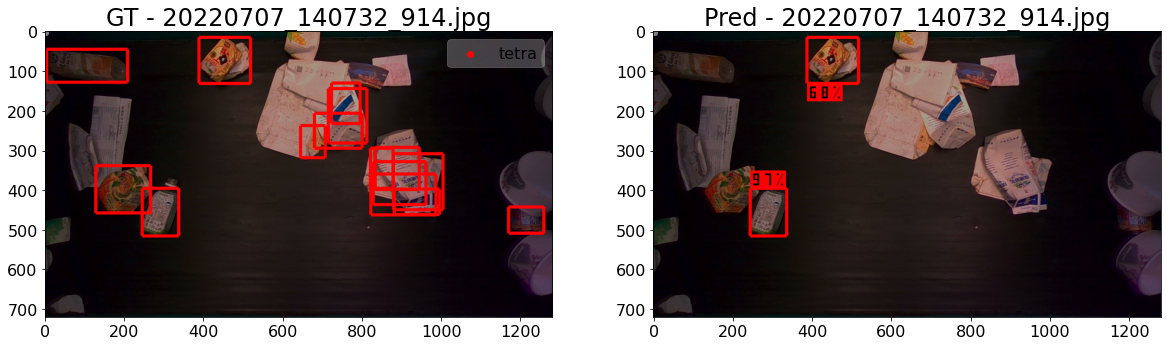

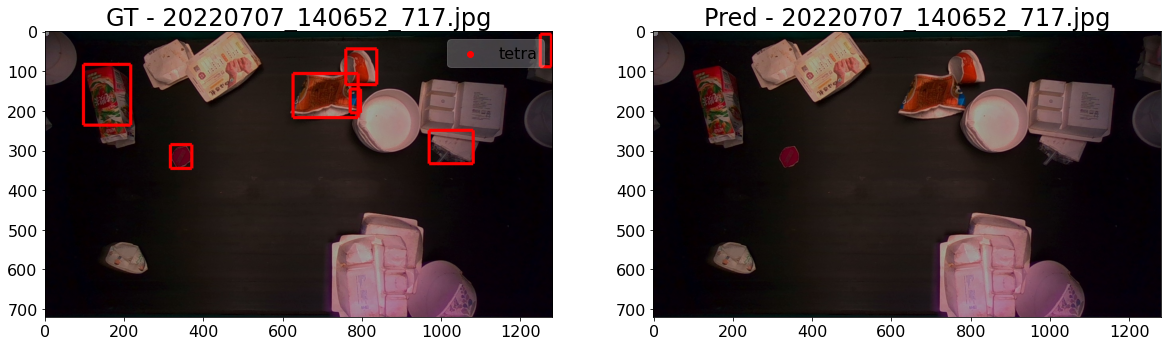

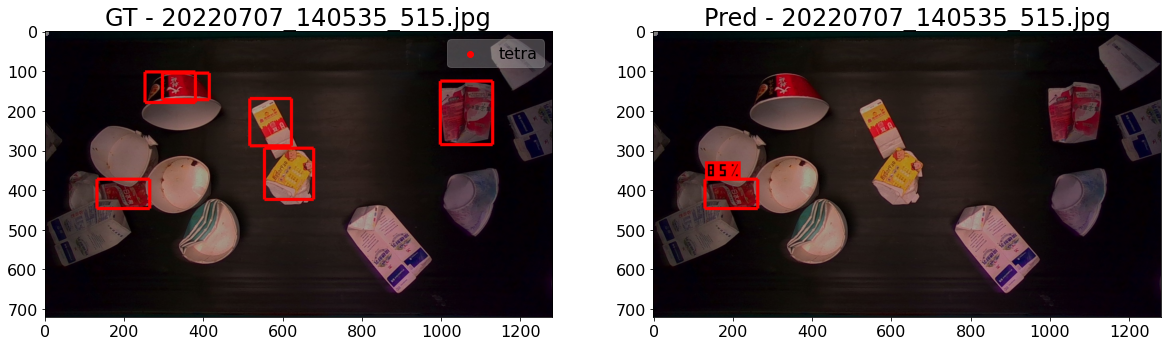

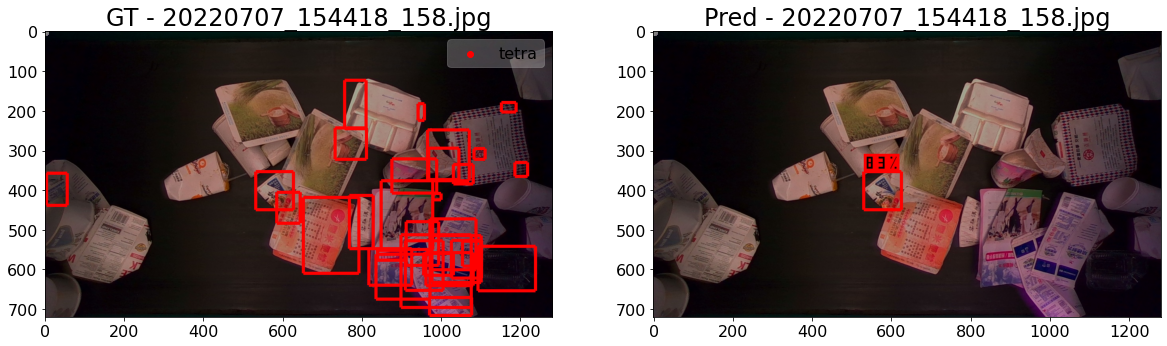

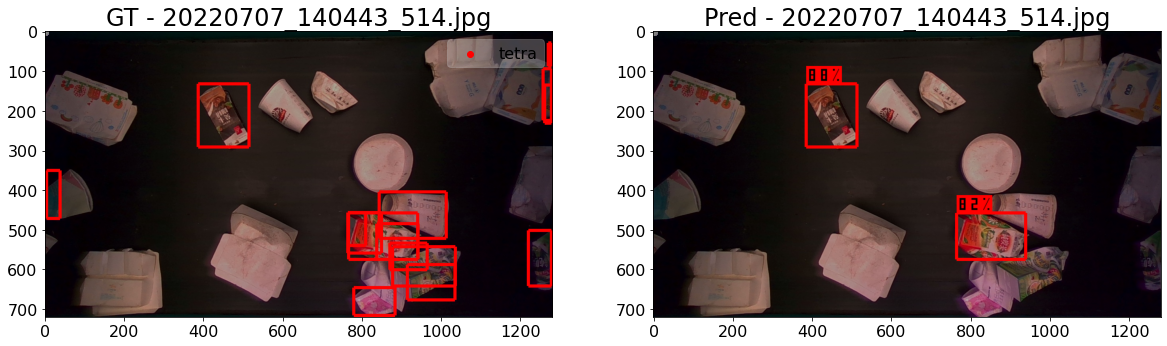

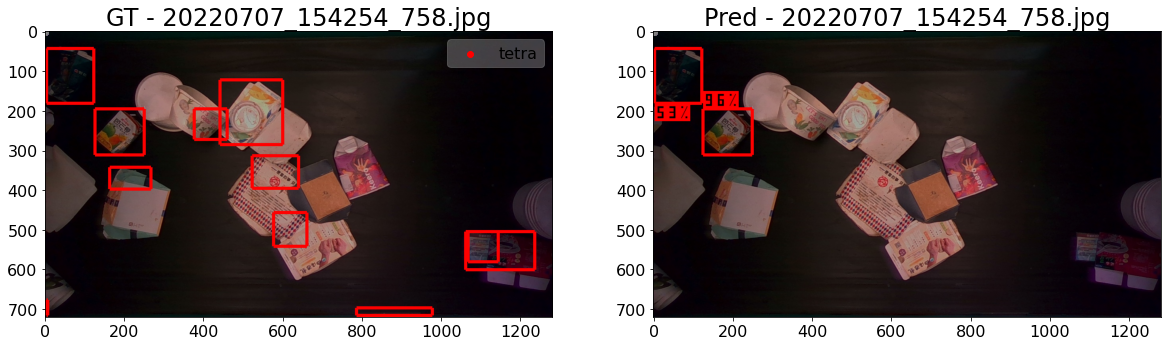

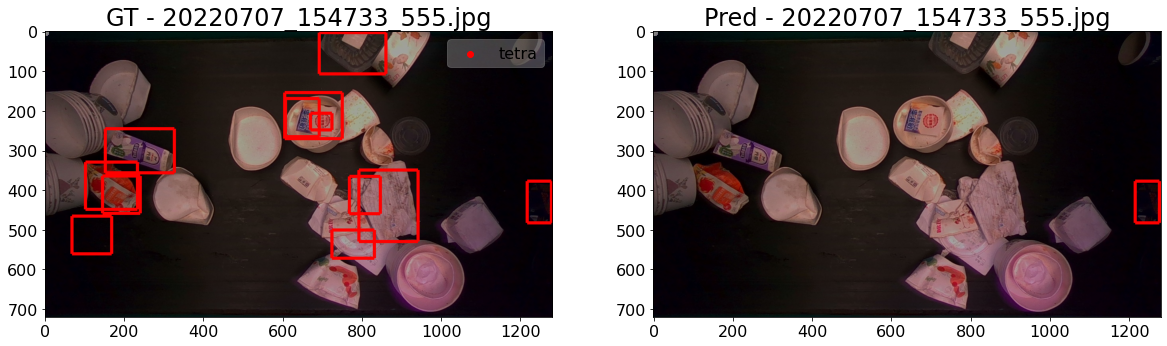

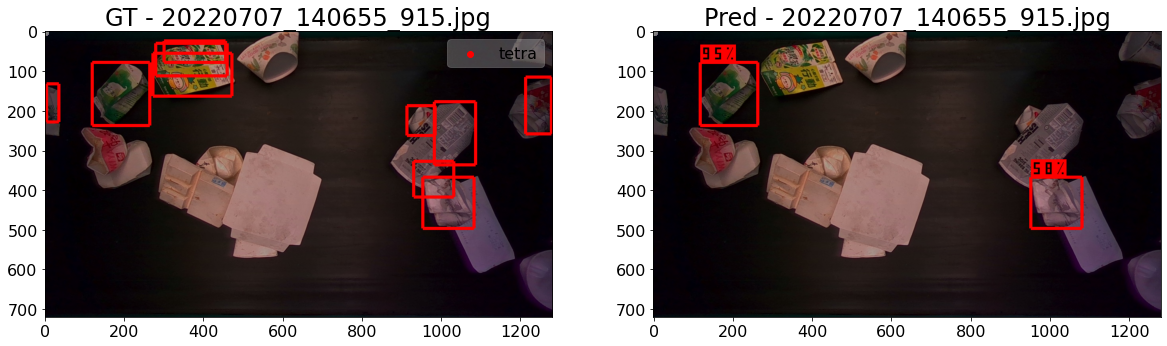

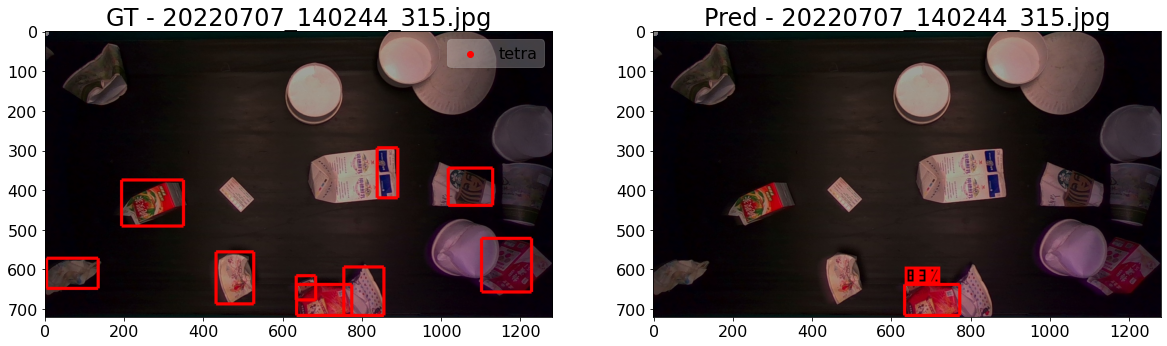

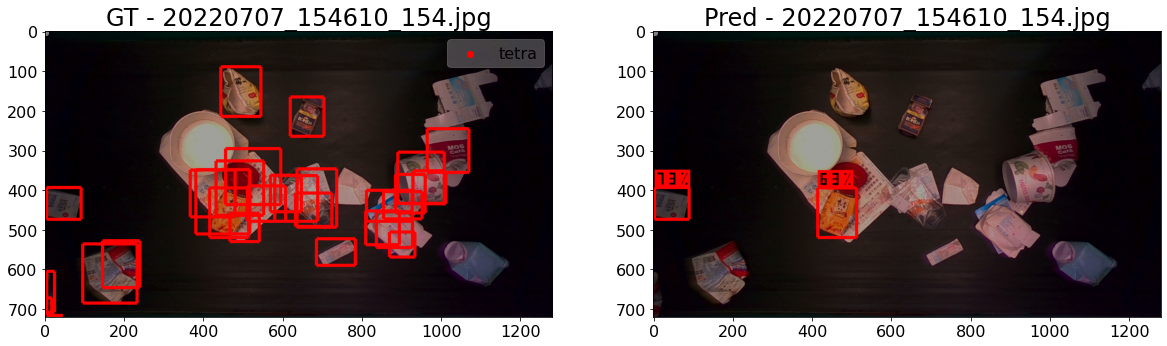

In [70]:
obj = Json2Yolo("../_data/unlabeled_0707/val.txt", "../runs/test/unlabeled0707/best_424_predictions.json", "/home/jovyan/data-vol-2/recycling/backboneData/2022-07-07/", ['tetra'])
#obj.convert()
obj.visualize(0.51, 10)

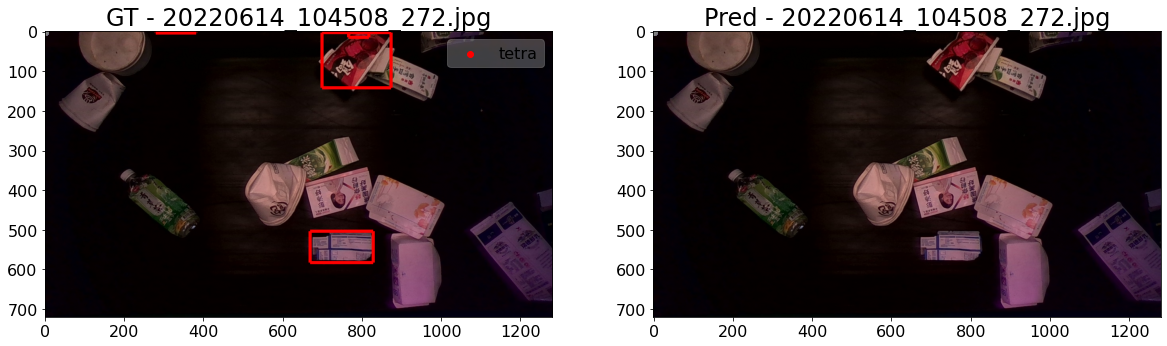

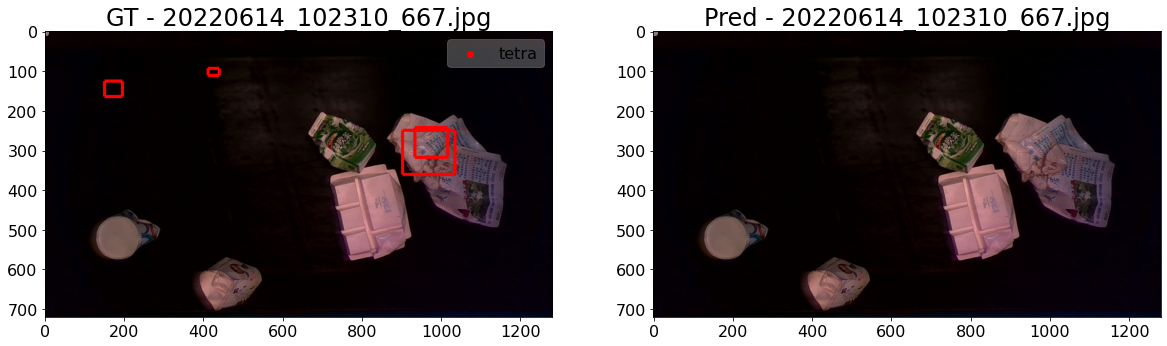

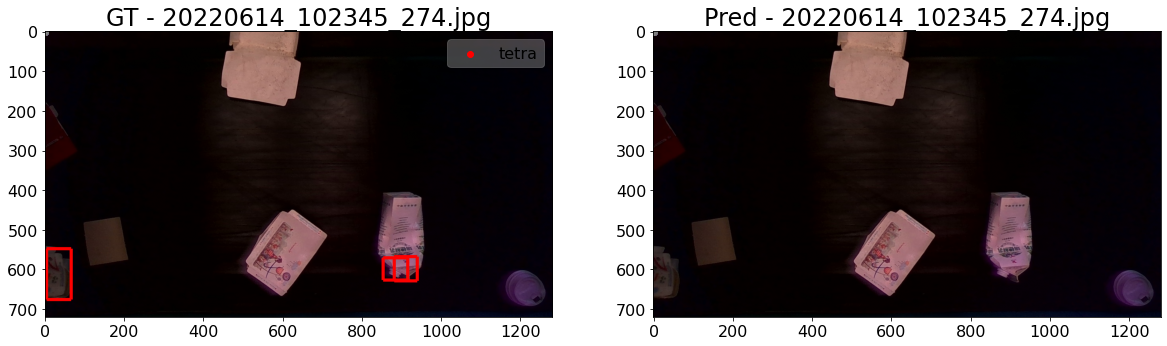

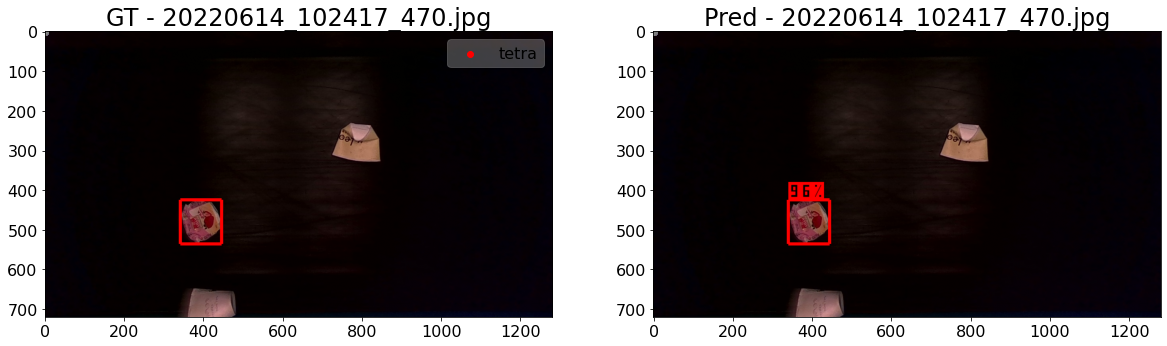

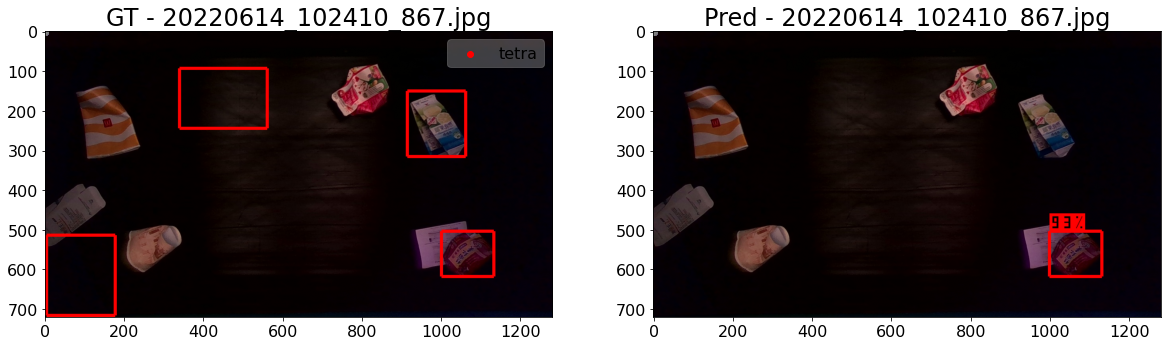

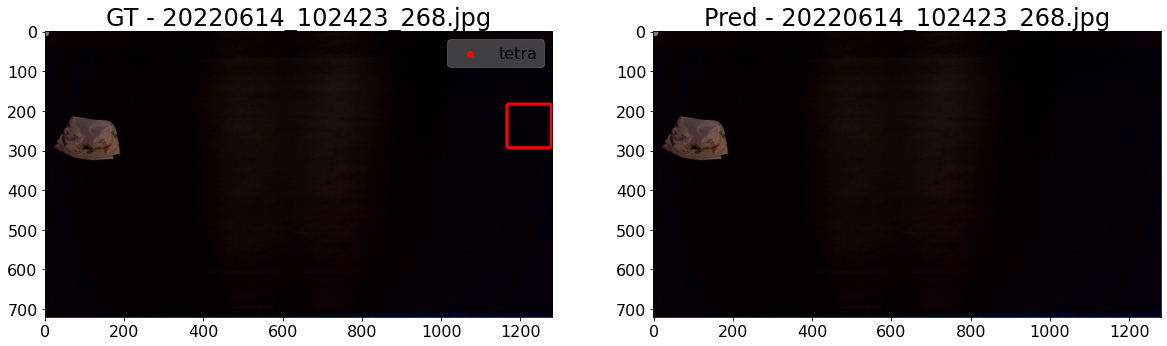

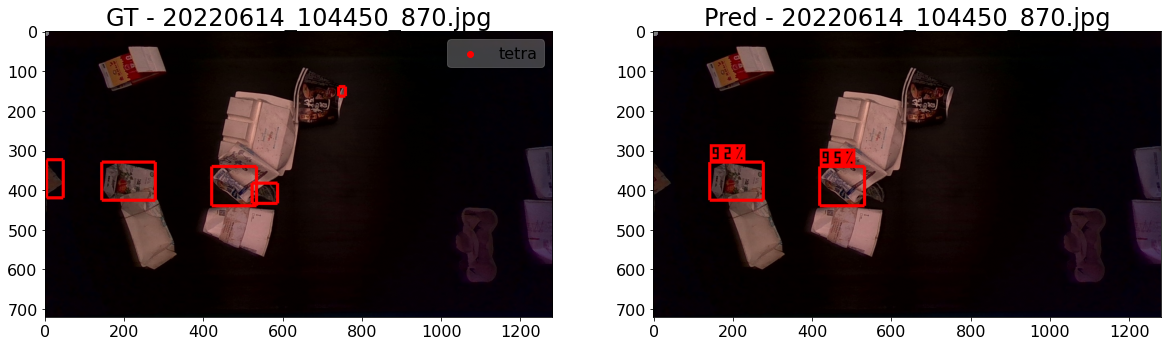

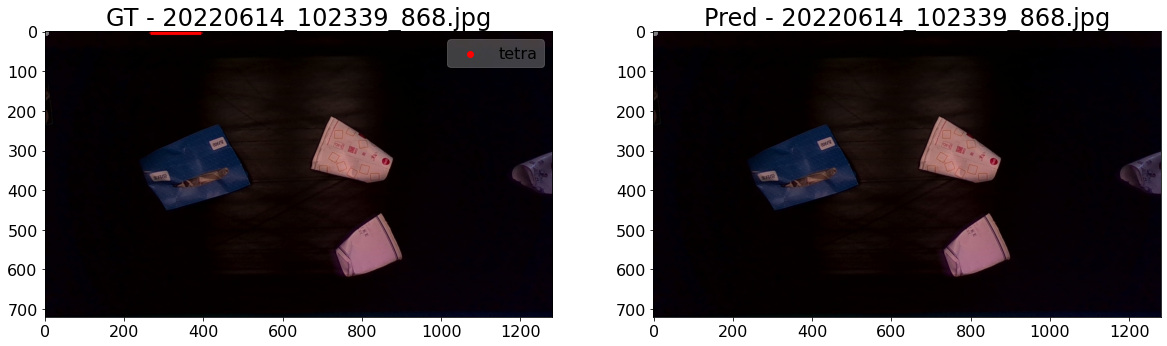

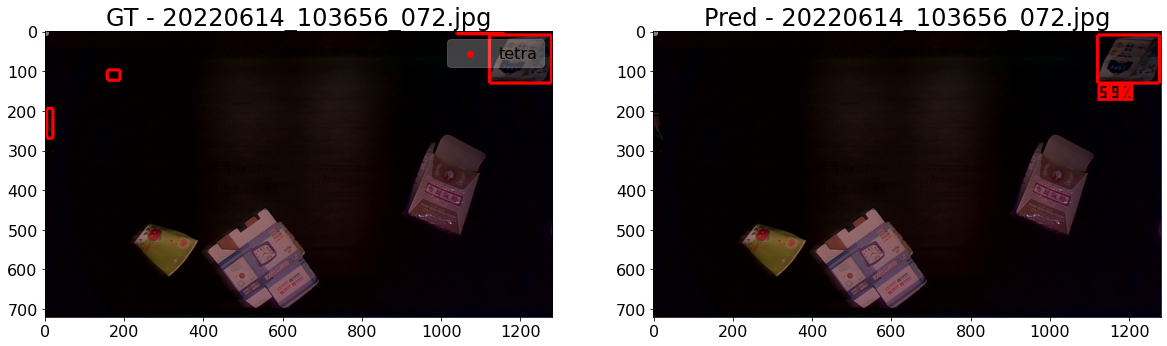

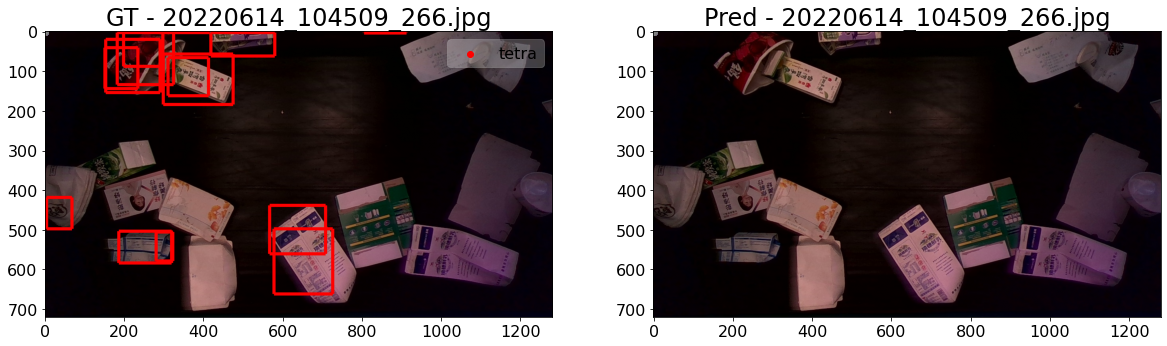

In [3]:
obj = Json2Yolo("../_data/unlabeled_0614/val.txt", "../runs/test/unlabeled0614_v4v2/best_424_predictions.json", "/home/jovyan/data-vol-2/recycling/backboneData/2022-06-14/", ['tetra'])
obj.convert()
obj.visualize(0.51, 10)

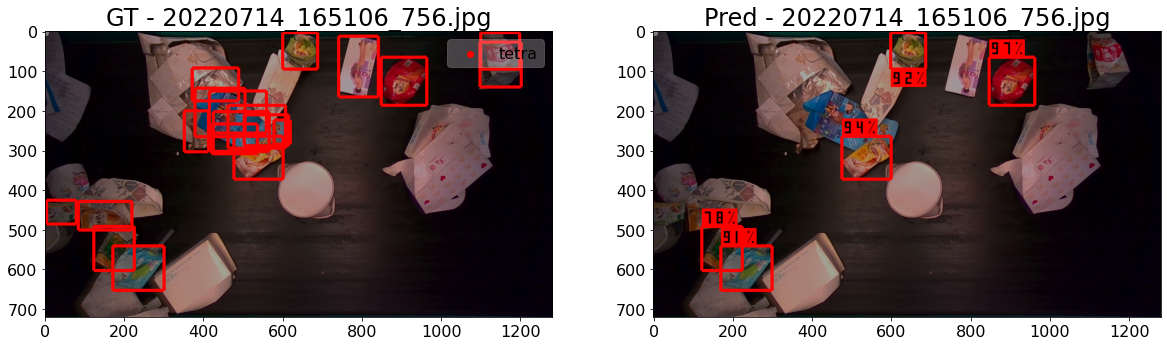

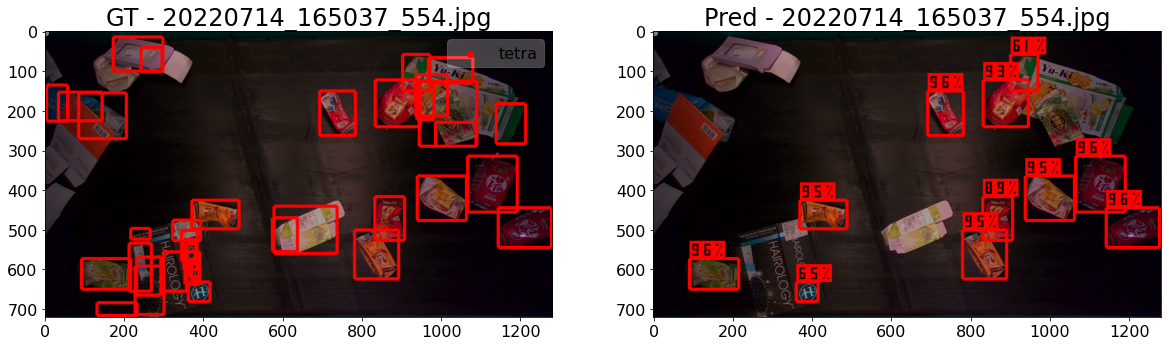

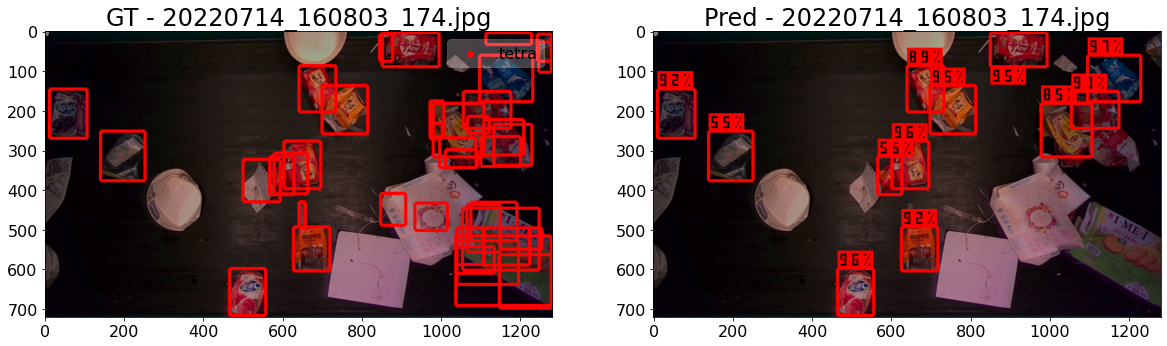

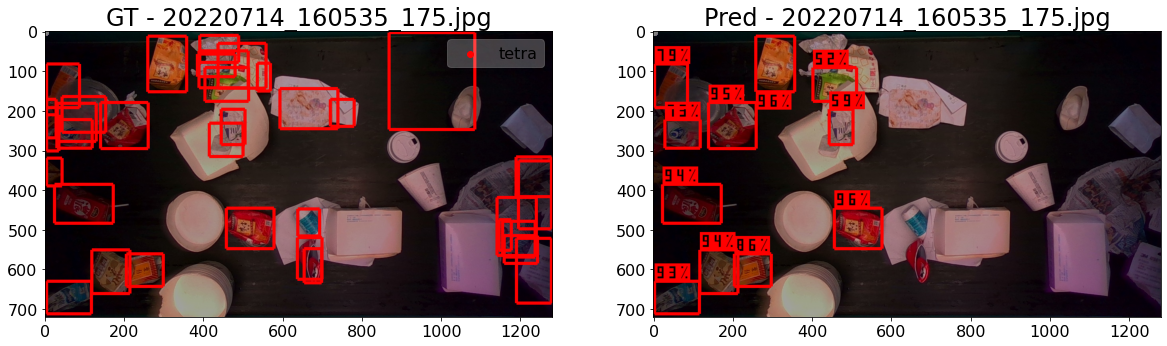

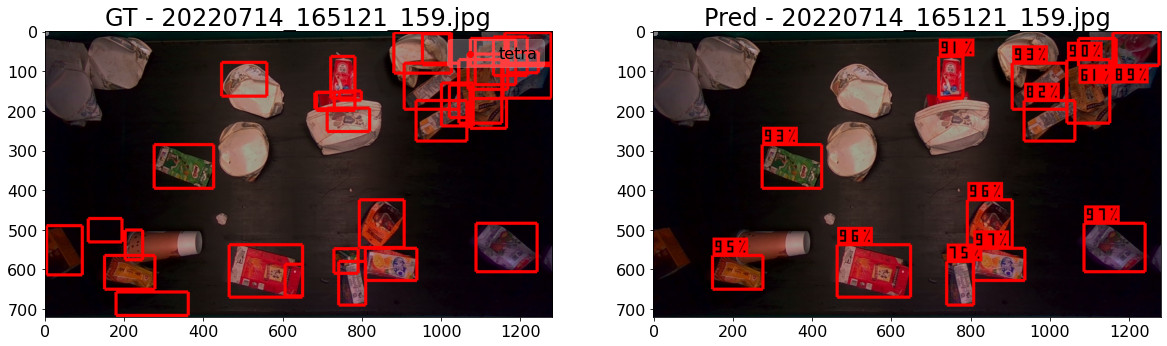

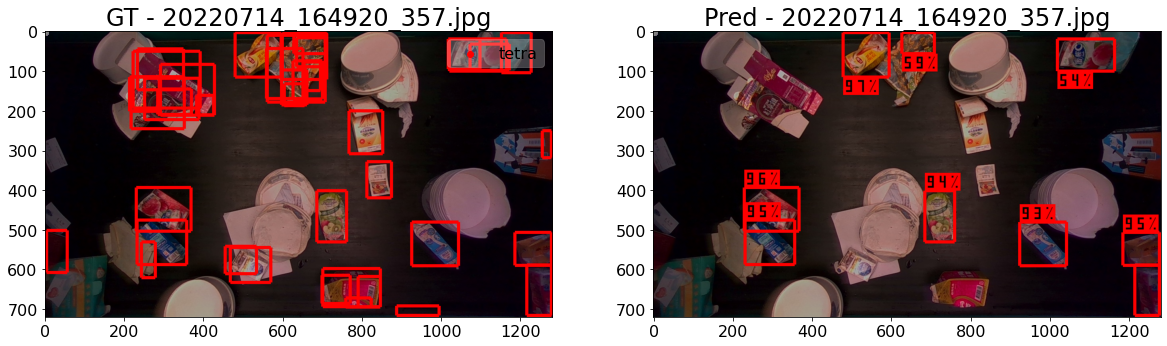

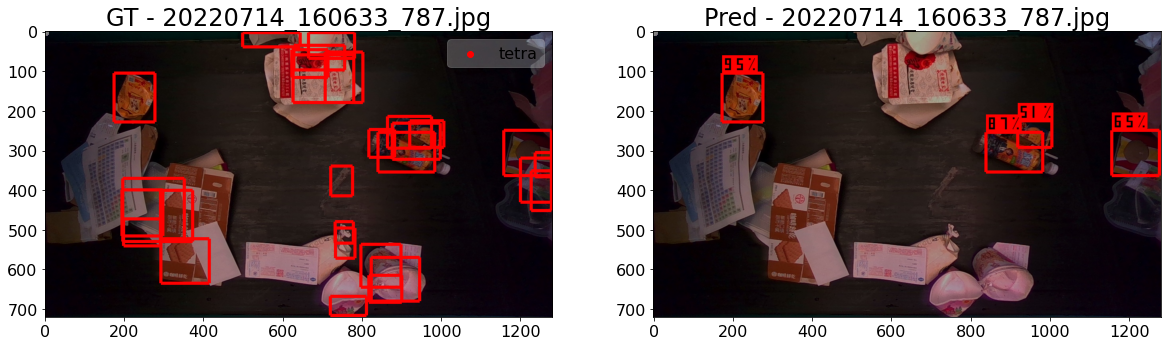

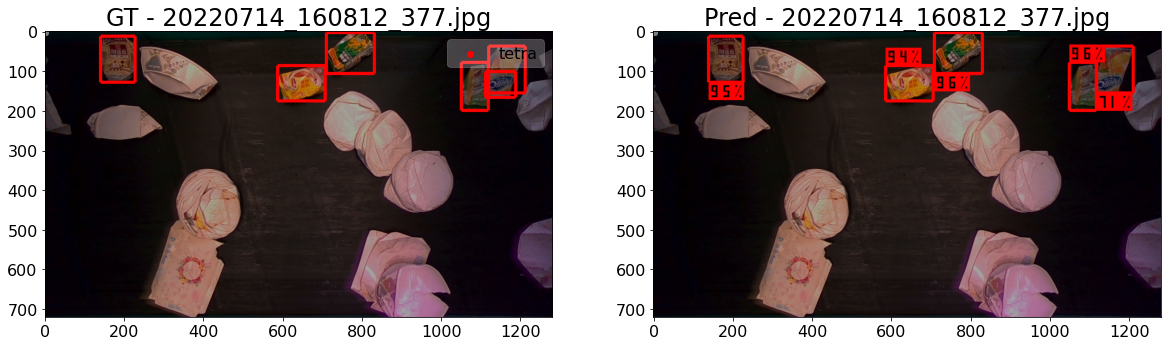

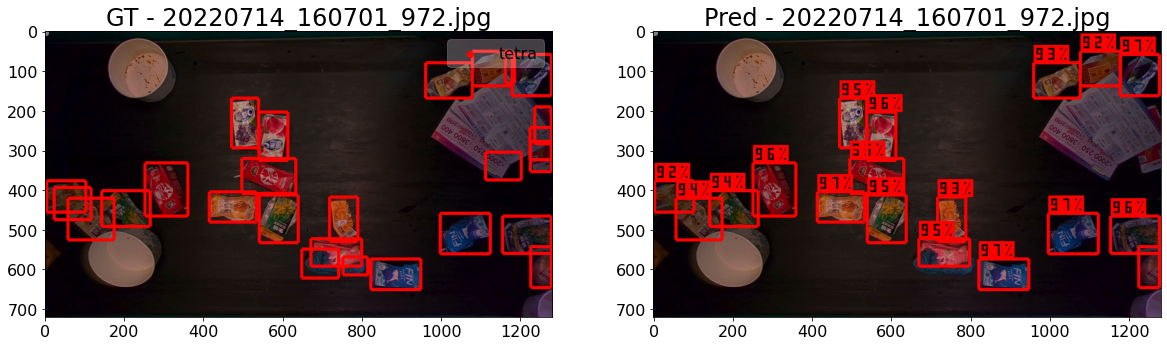

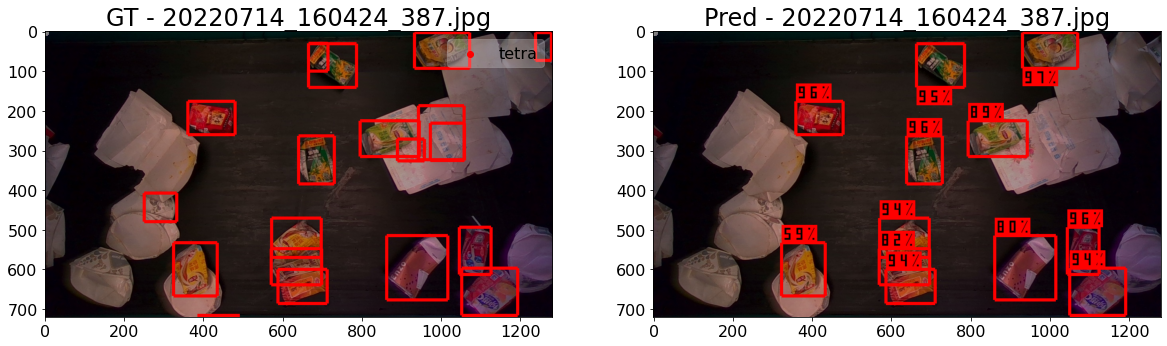

In [4]:
obj = Json2Yolo("../_data/unlabeled_0714/val.txt", "../runs/test/unlabeled0714_v4v2/best_424_predictions.json", "/home/jovyan/data-vol-2/recycling/backboneData/2022-07-14/", ['tetra'])
obj.convert()
obj.visualize(0.51, 10)